<a href="https://colab.research.google.com/github/Kaleab1999/Justice-ML/blob/main/Justice_M3_1_Rich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup Enviroment**

In [ ]:
import numpy as np
import os
import pandas as pd

import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification,XLMRobertaTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")


**Load Data**


In [ ]:
data=data[["እውነታው","ዝንባሌ"]]

In [ ]:
data=pd.read_excel("/content/justice1.xlsx")
data.head(10)

,Unnamed: 0,እውነታው,ዝንባሌ,ጉዳይ_አካባቢ
0,0,እ.ኤ.አ. በ 1970 ጄን ሮ (የከሳሹን ማንነት ለመጠበቅ በፍርድ ቤት ...,የተገለበጠ,NaN
1,1,ጆአን ስታንሊ ከፒተር ስታንሊ ጋር ሶስት ልጆችን ወልዷል። ስታንሊዎች አ...,ተቀልብሷል/ተጠየቀ,ሰብዓዊ መብቶች
2,2,<p>ጆን ጊሊዮ ሀሰተኛ የገንዘብ ማዘዣዎችን በማለፉ ተከሷል። ለሁለተኛው ...,ተቀልብሷል/ተጠየቀ,ተገቢ ሂደት
3,3,"የንብረት አስተዳዳሪዎችን በመሾም ""ወንዶች ከሴቶች ይልቅ መመረጥ አለባቸው...",ተቀልብሷል/ተጠየቀ,ሰብዓዊ መብቶች
4,4,<p>ሚለር፣ የ‹አዋቂ› ቁሳቁሶችን ሽያጭ ለማስተዋወቅ የጅምላ የፖስታ ዘ...,ተለቅቋል/ተጠየቀ,የመጀመሪያ ማሻሻያ
5,5,ኤርነስት ኢ ማንደል የቤልጂየም ፕሮፌሽናል ጋዜጠኛ እና የቤልጂየም ግራ ሶ...,የተገለበጠ,የመጀመሪያ ማሻሻያ
6,6,ኢሊኖይ ውስጥ የተደራጁ ወንጀሎችን ለመመርመር የኢሊኖይ ወንጀል ምርመራ ኮ...,NaN,የወንጀል ሂደት
7,7,ጆን አርገርሲንገር በፍሎሪዳ ግዛት ውስጥ የተደበቀ መሳሪያ በመያዝ የተከ...,የተገለበጠ,የወንጀል ሂደት
8,8,ዊልያም ቤርድ የቦስተን ዩንቨርስቲ በወሊድ ቁጥጥር እና ከመጠን በላይ መብ...,በማለት አረጋግጠዋል,ግላዊነት
9,9,<p>የጆርጂያ ግዛት ፍርድ ቤት ጆኒ ዊልሰን የመንግስትን ህግ በመጣስ ጥፋ...,በማለት አረጋግጠዋል,የመጀመሪያ ማሻሻያ


In [ ]:
import nltk
import re

In [ ]:
space_pattern = '\s+'
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
englishword_num ='[a-zA-Z]|[0-9]+'
AmhPunc='[፤።፡፣:,.?/()•“”*፨<>]+'
special_char = "[፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|]"
geez_number='[፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻] ' # for removing geez number
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
html_tags = re.compile(r'<.*?>')
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                 u"\U0001F1E0-\U0001F1FF"  # flags
                                 u"\U00002702-\U000027B0"
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
haa='[ሃ]'; he='[ሐ]'; hu='[ሑ]'; hi='[ሒ]'; ha='[ሓ]'; hie='[ሔ]'; h='[ሕ]'; ho='[ሖ]'; he1='[ኀ]'; hu1='[ኁ]'; hi1='[ኂ]'; ha1='[ኃ]'; hie1='[ኄ]'; h1='[ኅ]'; ho1='[ኆ]';
se='[ሠ]'; su='[ሡ]'; si='[ሢ]'; sa='[ሣ]'; sie='[ሤ]'; s='[ሥ]'; so='[ሦ]';
aa1='[ኣ]'; ae='[ዐ]'; au='[ዑ]'; ai='[ዒ]'; aa='[ዓ]'; aie='[ዔ]'; e='[ዕ]'; ao='[ዖ]';
tse='[ጸ]'; tsu='[ጹ]'; tsi='[ጺ]'; tsa='[ጻ]'; tsie='[ጼ]'; ts='[ጽ]'; tso='[ጾ]';

In [ ]:
corpus=[]
for i in range(0,len(data)):
    Clean_text = re.sub(url_regex,'', str(data['እውነታው'][i]))
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text=re.sub(html_tags ,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removingelongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = emoji_pattern.sub(r'', Clean_text)
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    ##################################################
    Clean_text= re.sub(he,'ሀ',Clean_text);
    Clean_text= re.sub(hu,'ሁ',Clean_text);
    Clean_text= re.sub(hi,'ሂ',Clean_text);
    Clean_text= re.sub(ha,'ሀ',Clean_text);
    Clean_text= re.sub(hie,'ሄ',Clean_text);
    Clean_text= re.sub(h,'ህ',Clean_text);
    Clean_text= re.sub(ho,'ሆ',Clean_text);
    Clean_text= re.sub(haa,'ሀ',Clean_text);
    #######################################################
    Clean_text= re.sub(he1,'ሀ',Clean_text)
    Clean_text= re.sub(hu1,'ሁ',Clean_text)
    Clean_text= re.sub(hi1,'ሂ',Clean_text)
    Clean_text= re.sub(ha1,'ሀ',Clean_text)
    Clean_text= re.sub(hie1,'ሄ',Clean_text)
    Clean_text= re.sub(h1,'ህ',Clean_text)
    Clean_text= re.sub(ho1,'ሆ',Clean_text)
    ##########################################################
    Clean_text= re.sub(se,'ሰ',Clean_text)
    Clean_text= re.sub(su,'ሱ',Clean_text)
    Clean_text= re.sub(si,'ሲ',Clean_text)
    Clean_text= re.sub(sa,'ሳ',Clean_text)
    Clean_text= re.sub(sie,'ሴ',Clean_text)
    Clean_text= re.sub(s,'ስ', Clean_text)
    Clean_text= re.sub(so,'ሶ',Clean_text)
    ###################################################
    Clean_text= re.sub(ae,'አ',Clean_text)
    Clean_text= re.sub(au,'ኡ',Clean_text)
    Clean_text= re.sub(ai,'ኢ',Clean_text)
    Clean_text= re.sub(aa,'አ',Clean_text)
    Clean_text= re.sub(aie,'ኤ',Clean_text)
    Clean_text= re.sub(e,'እ',Clean_text)
    Clean_text= re.sub(ao,'ኦ',Clean_text)
    Clean_text= re.sub(aa1,'አ',Clean_text)
    #############################################
    Clean_text= re.sub(tse,'ፀ',Clean_text)
    Clean_text= re.sub(tsu,'ፁ',Clean_text)
    Clean_text= re.sub(tsi,'ፂ',Clean_text)
    Clean_text= re.sub(tsa,'ፃ',Clean_text)
    Clean_text= re.sub(tsie,'ፄ',Clean_text)
    Clean_text= re.sub(ts,'ፅ',Clean_text)
    Clean_text= re.sub(tso,'ፆ',Clean_text)
    Clean_text= Clean_text.split()
    Clean_text = ' '.join(Clean_text)
    corpus.append(Clean_text)

In [ ]:
data.head(10)

,እውነታው,ዝንባሌ
0,እ.ኤ.አ. በ 1970 ጄን ሮ (የከሳሹን ማንነት ለመጠበቅ በፍርድ ቤት ...,የተገለበጠ
1,ጆአን ስታንሊ ከፒተር ስታንሊ ጋር ሶስት ልጆችን ወልዷል። ስታንሊዎች አ...,ተቀልብሷል/ተጠየቀ
2,<p>ጆን ጊሊዮ ሀሰተኛ የገንዘብ ማዘዣዎችን በማለፉ ተከሷል። ለሁለተኛው ...,ተቀልብሷል/ተጠየቀ
3,"የንብረት አስተዳዳሪዎችን በመሾም ""ወንዶች ከሴቶች ይልቅ መመረጥ አለባቸው...",ተቀልብሷል/ተጠየቀ
4,<p>ሚለር፣ የ‹አዋቂ› ቁሳቁሶችን ሽያጭ ለማስተዋወቅ የጅምላ የፖስታ ዘ...,ተለቅቋል/ተጠየቀ
5,ኤርነስት ኢ ማንደል የቤልጂየም ፕሮፌሽናል ጋዜጠኛ እና የቤልጂየም ግራ ሶ...,የተገለበጠ
6,ኢሊኖይ ውስጥ የተደራጁ ወንጀሎችን ለመመርመር የኢሊኖይ ወንጀል ምርመራ ኮ...,NaN
7,ጆን አርገርሲንገር በፍሎሪዳ ግዛት ውስጥ የተደበቀ መሳሪያ በመያዝ የተከ...,የተገለበጠ
8,ዊልያም ቤርድ የቦስተን ዩንቨርስቲ በወሊድ ቁጥጥር እና ከመጠን በላይ መብ...,በማለት አረጋግጠዋል
9,<p>የጆርጂያ ግዛት ፍርድ ቤት ጆኒ ዊልሰን የመንግስትን ህግ በመጣስ ጥፋ...,በማለት አረጋግጠዋል


In [ ]:
# prompt: return number of distinct categories in ዝንባሌ column with number of records
print(data.groupby('ዝንባሌ').size())

ዝንባሌ
ምንም                   41
በማለት አረጋግጠዋል        1007
በክፍል ተቀልብሷል           22
ተለቅቋል                  7
ተለቅቋል/ተጠየቀ           430
ተቀልብሷል/ተጠየቀ         1073
ከክፍል ተለቅቋል/ተጠየቀ        5
ከፊል ተቀልብሷል/ተከለከለ      61
የተገለበጠ               585
dtype: int64


In [ ]:
data=data[(data['ዝንባሌ'] == 'በማለት አረጋግጠዋል') |
                     (data['ዝንባሌ'] == 'ተቀልብሷል/ተጠየቀ')]

In [ ]:
# prompt: create dummies column to ዝንባሌ (0 and 1) Dro the first dummy

data = pd.get_dummies(data, columns=['ዝንባሌ'], drop_first=True)


In [ ]:
data.head()

,እውነታው,ዝንባሌ_ተቀልብሷል/ተጠየቀ
1,ጆአን ስታንሊ ከፒተር ስታንሊ ጋር ሶስት ልጆችን ወልዷል። ስታንሊዎች አ...,True
2,<p>ጆን ጊሊዮ ሀሰተኛ የገንዘብ ማዘዣዎችን በማለፉ ተከሷል። ለሁለተኛው ...,True
3,"የንብረት አስተዳዳሪዎችን በመሾም ""ወንዶች ከሴቶች ይልቅ መመረጥ አለባቸው...",True
8,ዊልያም ቤርድ የቦስተን ዩንቨርስቲ በወሊድ ቁጥጥር እና ከመጠን በላይ መብ...,False
9,<p>የጆርጂያ ግዛት ፍርድ ቤት ጆኒ ዊልሰን የመንግስትን ህግ በመጣስ ጥፋ...,False


In [ ]:
data.columns

Index(['እውነታው', 'ዝንባሌ_ተቀልብሷል/ተጠየቀ'], dtype='object')

In [ ]:
# Separate features and dummy labels
features = data['እውነታው']
dummy_labels = data.drop(columns=['እውነታው'])

In [ ]:
data['ዝንባሌ_ተቀልብሷል/ተጠየቀ']=data['ዝንባሌ_ተቀልብሷል/ተጠየቀ'].astype(int)

In [ ]:
dummy_labels.head()

,ዝንባሌ_ተቀልብሷል/ተጠየቀ
1,True
2,True
3,True
8,False
9,False


In [ ]:
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(
    data['እውነታው'], data['ዝንባሌ_ተቀልብሷል/ተጠየቀ'], random_state=2018, test_size=0.2
)

# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels, random_state=2018, test_size=0.3
)

**AfriBERTa Fine Tunning**

In [ ]:
from transformers import XLMRobertaModel, XLMRobertaTokenizer

In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = XLMRobertaModel.from_pretrained('xlm-roberta-base')
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Tokenize text Data

Text(0, 0.5, 'Number of texts')

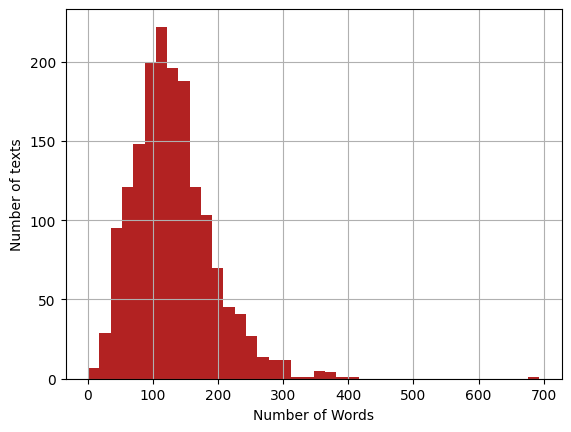

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(Actual_Post.split()) for Actual_Post in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 20
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
import torch

# Convert lists to tensors for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.values.tolist())

# Convert lists to tensors for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.values.tolist())

# Convert lists to tensors for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.values.tolist())

In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

In [ ]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

In [ ]:
from transformers import XLMRobertaModel, XLMRobertaTokenizer, AdamW, get_linear_schedule_with_warmup
class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.LogSoftmax(dim=1)
        self.batch_norm = nn.BatchNorm1d(512)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
        x = self.fc1(cls_hs)
        x = self.batch_norm(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = BERT_Arch(bert)

# Freeze the parameters of the pre-trained model
for param in bert.parameters():
    param.requires_grad = False

# Define the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
# Define the loss function
cross_entropy = nn.NLLLoss()
epochs=5

# Total number of training steps is [number of batches] x [number of epochs]
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

# Define the loss function
cross_entropy = nn.NLLLoss()


# Mixed precision training
scaler = torch.cuda.amp.GradScaler()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training and evaluation functions
def train():
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and not step == 0:
            print(f'  Batch {step} of {len(train_dataloader)}.')

        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    return avg_loss

def evaluate():
    print("\nEvaluating...")
    model.eval()
    total_loss = 0

    for step, batch in enumerate(val_dataloader):
        if step % 50 == 0 and not step == 0:
            print(f'  Batch {step} of {len(val_dataloader)}.')

        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch

        with torch.no_grad():
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss += loss.item()

    avg_loss = total_loss / len(val_dataloader)
    return avg_loss

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BERT_Arch(
  (bert): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses = []
valid_losses = []

for epoch in range(epochs):
    print(f'\n Epoch {epoch + 1} / {epochs}')
    train_loss = train()
    valid_loss = evaluate()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch 50 of 52.

Evaluating...

Training Loss: 0.725
Validation Loss: 0.699

 Epoch 2 / 5
  Batch 50 of 52.

Evaluating...

Training Loss: 0.708
Validation Loss: 0.694

 Epoch 3 / 5
  Batch 50 of 52.

Evaluating...

Training Loss: 0.706
Validation Loss: 0.697

 Epoch 4 / 5
  Batch 50 of 52.

Evaluating...

Training Loss: 0.717
Validation Loss: 0.700

 Epoch 5 / 5
  Batch 50 of 52.

Evaluating...

Training Loss: 0.708
Validation Loss: 0.698


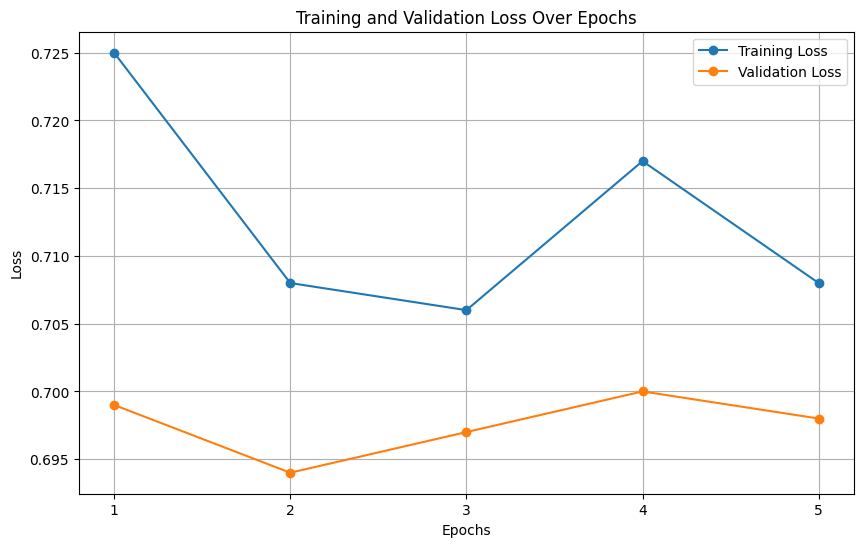

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
epochs = [1, 2, 3, 4, 5]
training_loss = [0.725, 0.708, 0.706, 0.717, 0.708]
validation_loss = [0.699, 0.694, 0.697, 0.700, 0.698]

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')

# Adding titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis=1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.67      0.04      0.07        51
           1       0.60      0.99      0.74        74

    accuracy                           0.60       125
   macro avg       0.63      0.51      0.41       125
weighted avg       0.63      0.60      0.47       125



In [ ]:
!pip install shap

In [ ]:

#shap.plots.text(shap_values[0])


In [ ]:
import shap
import torch

# Define the prediction function for SHAP
def predict_proba(texts):
    model.eval()
    inputs = tokenizer.batch_encode_plus(texts, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(inputs['input_ids'], inputs['attention_mask'])
        probs = torch.nn.functional.softmax(outputs, dim=1)
    return probs.cpu().numpy()

# Example usage of SHAP
def explain_prediction(input_text, model, tokenizer):
    # Tokenize the input text
    inputs = tokenizer.batch_encode_plus([input_text], padding=True, truncation=True, return_tensors="pt")

    # Move the inputs to the appropriate device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Print input shapes for debugging
    print(f"Input IDs shape: {inputs['input_ids'].shape}")
    print(f"Attention mask shape: {inputs['attention_mask'].shape}")

    # Create a SHAP explainer object
    explainer = shap.Explainer(predict_proba, tokenizer)

    # Explain the model's predictions for the input text
    shap_values = explainer([input_text])

    # Visualize the SHAP values
    shap.plots.text(shap_values[0])

# Example input text
input_text = "ሁለት ፖሊሶች የጎዳና ላይ ልብሶችን ለብሰው ከፊትና ከኋላ “ፖሊስ” የሚል ጃኬት ለብሰው አዲስ አበባ ውስጥ ምልክት በሌለው መኪና ውስጥ በጥበቃ ላይ ነበሩ። በስታዲየም አቅራቢያ ወደተገኙ ወጣቶች ሲጠጉ። እና ወደ ሪቼ መንገድ ወጣቶቹ ደንግጠው ሮጡ። ከመኮንኖቹ አንዱ መኪናውን ለቆ አንዱን ከኋላው ሮጦ ትንሽ አለት የሚመስል ነገር መኮንኑ ከመታቱ እና እጁን በካቴና አስሮታል። ባለሥልጣኑ ድንጋዩን ፈልቅቆ ወሰደው፣ ክራክ ኮኬይን ሆነ። የመጀመርያው ፍርድ ቤት አቤቱታውን ውድቅ አድርጎታል። የልደታ ይግባኝ ሰሚ ፍርድ ቤት መኮንኑ ወደ እሱ ሲሮጥ ሲመለከት ያ እንደተያዘ እና በአራተኛው ማሻሻያ መሰረት ይህ መናድ ምክንያታዊ እንዳልሆነ በመያዝ ተለወጠ። የካሊፎርኒያ ጠቅላይ ፍርድ ቤት ለግምገማ የግዛቱን ማመልከቻ ውድቅ አደረገ።"

# Apply SHAP to explain the prediction
explain_prediction(input_text, model, tokenizer)

Input IDs shape: torch.Size([1, 226])
Attention mask shape: torch.Size([1, 226])


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:10, 10.10s/it]               
